#  
<h1 style="font-size:250%; font-family:cursive; color:#ff6666;"> <b>1. Getting Data Ready <a id="0"></a></b></h1>

In [3]:
import os
import pathlib
from pathlib import Path 

### 1.1 Creating train and test directory and exploring them

In [28]:
image_path = Path("data/food-101")
train_dir  = image_path/"Train"
test_dir   = image_path/"Test"

#### Checking number of image samples in each set

In [23]:
print(f"Number of images in Training set is: {len(list(train_dir.glob('*/*.jpg')))}\nNumber of images in Testing set is: {len(list(test_dir.glob('*/*.jpg')))}")
# this is memory consuming as we have to make list here

Number of images in Training set is: 70700
Number of images in Testing set is: 30300


In [ ]:
train_image_count = sum(1 for _ in train_dir.rglob('*.jpg'))
test_image_count = sum(1 for _ in test_dir.rglob('*.jpg'))

#rglob recursively seraches for .jpg file. 

print(f"Number of images in Training set is: {train_image_count}")
print(f"Number of images in Testing set is: {test_image_count}")

#memory efficient alternative

Number of images in Training set is: 70700
Number of images in Testing set is: 30300


### 1.2 Finding Class Labels and converting them to class index

In [13]:
class_names = sorted(os.listdir(train_dir)) 
class_to_idx = { name:i for i, name in enumerate(class_names)}

# <h1 style = "font-size:250%; family:'cursive'; color:#ff6666"> 2. Create DataLoader <a id=2></a></h1>

In [16]:
import torch
import torchvision
from torchvision import transforms
from torch import nn 

### 2.1 Create Transforms using pretrained model weights

In [17]:
# Before we Create dataloader lets select an pretrained model so that we can get the transforms applied on that model.

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

### 2.2 Create custom dataloader

In [48]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch.utils.data import Dataset 
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

#### Using ImageFolder for dataset

In [22]:
train_dataset_img = datasets.ImageFolder(root =train_dir,
                                         transform = auto_transforms,
                                         target_transform = None
)
#bad bad

In [31]:

class ImageDataset(Dataset):
    def __init__(self,target_dir,transform= None):
        self.paths = list(Path(target_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes = sorted(os.listdir(target_dir))
        self.class_to_idx = {name:i for i,name in enumerate(self.classes)}
    
    def __len__(self):
        return(len(self.paths))

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx])
        class_name = self.paths[idx].parent.stem
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        
        else:
            return img, class_idx
    
    

In [47]:
train_dataset = ImageDataset(target_dir=train_dir, transform = auto_transforms)
test_dataset = ImageDataset(target_dir=test_dir, transform=auto_transforms)

In [61]:
# Displaying some random Images from the custom dataset we created.
def disp_random_images(dataset,classes,n,seed):
    random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k =n)

    plt.figure(figsize=(16,8))

    for i, sample in enumerate(random_samples_idx):

        img,label = dataset[sample][0], dataset[sample][1]

        img_adjust = img.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(img_adjust)
        plt.axis(False)
        title = f"Class: {classes[label]}"
        plt.title(title)
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.4285715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..2.4831376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.64].


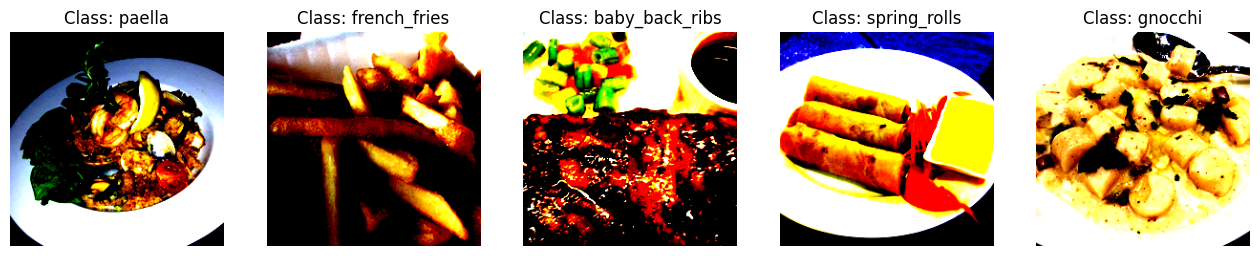

In [69]:
disp_random_images(train_dataset, class_names,5,None)

In [70]:
os.cpu_count()

12

#### Now change the dataset into dataloader

In [72]:
train_dataloader = DataLoader( dataset = train_dataset,
                               batch_size = 32,
                               num_workers = os.cpu_count()-4,
                               shuffle = True,
                               pin_memory =True
)

test_dataloader = DataLoader( dataset = test_dataset,
                              batch_size =32,
                              num_workers = os.cpu_count()-4,
                              shuffle = False,
                              pin_memory = True

)